# 금융시계열(pandas)

6-1 pandas 기초

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.DataFrame([10,20,30,40],columns = ['numbers'], index = ['a','b','c','d'])

In [5]:
df

,numbers
a,10
b,20
c,30
d,40


In [6]:
df.index # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [7]:
df.columns #  열이름

Index(['numbers'], dtype='object')

In [8]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [9]:
df.loc[['a','d']]   #여러개 index 사용한 선택

,numbers
a,10
d,40


In [10]:
df.loc[df.index[1:3]]  #index 객체를 사용한 선택

,numbers
b,20
c,30


In [11]:
df.sum()  # column's sum

numbers    100
dtype: int64

In [12]:
df.apply(lambda x : x**2) # each part ^2

,numbers
a,100
b,400
c,900
d,1600


In [13]:
df**2 #numpy 스타일 제곱

,numbers
a,100
b,400
c,900
d,1600


In [14]:
df['floats'] = (1.5,2.5,3.5,4.5)   #() 새로운 열 생성
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [15]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [16]:
df['names'] =  pd.DataFrame(['Yves','Guido','Felix','Francesc'],index=['d','a','b','c'])   #인덱스 지정시 자동으로 정렬

In [17]:
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [18]:
df.append({'numbers':100,'floats':5.75,'names':'Henry'}, ignore_index = True) #인덱스 보존X 정수index로 변경 -> 직접 말고 DataFrame으로
                                                                               # df = df.append(~~)가아니므로 임시생성

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [19]:
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [20]:
df = df.append(pd.DataFrame({'numbers':100,'floats':5.75,'names':'Henry'},index=['z',]))     #?? 왜 책에서는 number가 맨뒤?
df

,numbers,floats,names
a,10,1.50,Guido
b,20,2.50,Felix
c,30,3.50,Francesc
d,40,4.50,Yves
z,100,5.75,Henry


In [21]:
df.join(pd.DataFrame([1,4,9,16,25],
                     index = ['a','b','c','d','y'],    #y인덱스 없어서 y자료는 없어지고, z는 설정안해줘서 NaN
                    columns = ['squares',])) 

,numbers,floats,names,squares
a,10,1.50,Guido,1.0
b,20,2.50,Felix,4.0
c,30,3.50,Francesc,9.0
d,40,4.50,Yves,16.0
z,100,5.75,Henry,NaN


In [22]:
df = df.join(pd.DataFrame([1,4,9,16,25],
                     index = ['a','b','c','d','y'],
                    columns = ['squares',]),
            how = 'outer')   #y보존하고 싶으면 <-이거 해서 새로운 인덱스로 생성 가능하게 해줘야함
df

,numbers,floats,names,squares
a,10.0,1.50,Guido,1.0
b,20.0,2.50,Felix,4.0
c,30.0,3.50,Francesc,9.0
d,40.0,4.50,Yves,16.0
y,NaN,NaN,NaN,25.0
z,100.0,5.75,Henry,NaN


how = 'outer' ,'inner','left','right' 순서대로 인덱스 합집합, 교집합, left는 디폴트 옵션값으로 호출 객체 인덱스 사용, right는 join되는 인덱스 사용

In [23]:
df[['numbers','squares']].mean()   # each columns average

numbers    40.0
squares    11.0
dtype: float64

In [24]:
df[['numbers','squares']].std() #표편

numbers    35.355339
squares     9.669540
dtype: float64

In [25]:
a = np.random.standard_normal((9,4)) #9행 4열
a.round(6) #소수점 아래 개수

array([[ 2.273904, -0.312859,  2.492615,  0.364081],
       [ 0.556245,  1.858582, -0.264276,  1.108044],
       [-0.302678, -0.152055, -0.67967 ,  0.682296],
       [-0.317773,  0.128224, -0.724131, -0.032866],
       [ 0.34135 ,  0.571931,  1.246854,  1.328263],
       [ 0.218525, -1.010316,  0.110255, -1.059843],
       [-0.659389,  2.372939,  0.657872, -0.374198],
       [-1.335374,  0.017698, -1.078814,  1.503289],
       [ 1.06163 , -0.581685,  1.21518 ,  0.438078]])

In [26]:
df= pd.DataFrame(a)   #이렇게 자료배열하면 인덱스들만 추가하면 됨. 일반적인 방법
df

,0,1,2,3
0,2.273904,-0.312859,2.492615,0.364081
1,0.556245,1.858582,-0.264276,1.108044
2,-0.302678,-0.152055,-0.679670,0.682296
3,-0.317773,0.128224,-0.724131,-0.032866
4,0.341350,0.571931,1.246854,1.328263
5,0.218525,-1.010316,0.110255,-1.059843
6,-0.659389,2.372939,0.657872,-0.374198
7,-1.335374,0.017698,-1.078814,1.503289
8,1.061630,-0.581685,1.215180,0.438078


In [27]:
df.columns = ['No1','No2','No3','No4']
df

,No1,No2,No3,No4
0,2.273904,-0.312859,2.492615,0.364081
1,0.556245,1.858582,-0.264276,1.108044
2,-0.302678,-0.152055,-0.679670,0.682296
3,-0.317773,0.128224,-0.724131,-0.032866
4,0.341350,0.571931,1.246854,1.328263
5,0.218525,-1.010316,0.110255,-1.059843
6,-0.659389,2.372939,0.657872,-0.374198
7,-1.335374,0.017698,-1.078814,1.503289
8,1.061630,-0.581685,1.215180,0.438078


In [28]:
df['No2'][3] 

0.12822382264583362

In [29]:
dates = pd.date_range('2015-1-1',periods = 9, freq = 'M') #freq 간격 여기서는 한달간격 #MS하면 초기로
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [30]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,2.273904,-0.312859,2.492615,0.364081
2015-02-28,0.556245,1.858582,-0.264276,1.108044
2015-03-31,-0.302678,-0.152055,-0.679670,0.682296
2015-04-30,-0.317773,0.128224,-0.724131,-0.032866
2015-05-31,0.341350,0.571931,1.246854,1.328263
2015-06-30,0.218525,-1.010316,0.110255,-1.059843
2015-07-31,-0.659389,2.372939,0.657872,-0.374198
2015-08-31,-1.335374,0.017698,-1.078814,1.503289
2015-09-30,1.061630,-0.581685,1.215180,0.438078


In [31]:
np.array(df).round(6) #np->df 역도 가능

array([[ 2.273904, -0.312859,  2.492615,  0.364081],
       [ 0.556245,  1.858582, -0.264276,  1.108044],
       [-0.302678, -0.152055, -0.67967 ,  0.682296],
       [-0.317773,  0.128224, -0.724131, -0.032866],
       [ 0.34135 ,  0.571931,  1.246854,  1.328263],
       [ 0.218525, -1.010316,  0.110255, -1.059843],
       [-0.659389,  2.372939,  0.657872, -0.374198],
       [-1.335374,  0.017698, -1.078814,  1.503289],
       [ 1.06163 , -0.581685,  1.21518 ,  0.438078]])

In [32]:
df.sum(), df.mean(), df.cumsum()  #cumsum 누적합

(No1    1.836441
 No2    2.892458
 No3    2.975884
 No4    3.957144
 dtype: float64,
 No1    0.204049
 No2    0.321384
 No3    0.330654
 No4    0.439683
 dtype: float64,
                  No1       No2       No3       No4
 2015-01-31  2.273904 -0.312859  2.492615  0.364081
 2015-02-28  2.830149  1.545723  2.228339  1.472124
 2015-03-31  2.527472  1.393668  1.548670  2.154420
 2015-04-30  2.209698  1.521891  0.824539  2.121554
 2015-05-31  2.551048  2.093823  2.071392  3.449818
 2015-06-30  2.769573  1.083506  2.181647  2.389974
 2015-07-31  2.110185  3.456445  2.839519  2.015776
 2015-08-31  0.774811  3.474143  1.760704  3.519065
 2015-09-30  1.836441  2.892458  2.975884  3.957144)

In [33]:
df.describe()  #여러통계

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.204049,0.321384,0.330654,0.439683
std,1.049242,1.116889,1.168621,0.834146
min,-1.335374,-1.010316,-1.078814,-1.059843
25%,-0.317773,-0.312859,-0.679670,-0.032866
50%,0.218525,0.017698,0.110255,0.438078
75%,0.556245,0.571931,1.215180,1.108044
max,2.273904,2.372939,2.492615,1.503289


In [34]:
np.sqrt(df)

<ipython-input-34-3d51942bd622>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(df)


,No1,No2,No3,No4
2015-01-31,1.507947,NaN,1.578802,0.603391
2015-02-28,0.745818,1.363298,NaN,1.052637
2015-03-31,NaN,NaN,NaN,0.826012
2015-04-30,NaN,0.358084,NaN,NaN
2015-05-31,0.584252,0.756261,1.116626,1.152503
2015-06-30,0.467467,NaN,0.332046,NaN
2015-07-31,NaN,1.540435,0.811093,NaN
2015-08-31,NaN,0.133034,NaN,1.226087
2015-09-30,1.030355,NaN,1.102352,0.661875


In [35]:
np.sqrt(df).sum()

<ipython-input-35-8c4762bd273f>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(df).sum()


No1    4.335838
No2    4.151111
No3    4.940919
No4    5.522504
dtype: float64

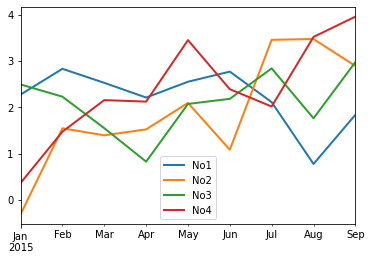

In [36]:
%matplotlib inline  
df.cumsum().plot(lw=2.0)#바로 보여주는곳

series

In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
df['No1']

2015-01-31    2.273904
2015-02-28    0.556245
2015-03-31   -0.302678
2015-04-30   -0.317773
2015-05-31    0.341350
2015-06-30    0.218525
2015-07-31   -0.659389
2015-08-31   -1.335374
2015-09-30    1.061630
Freq: M, Name: No1, dtype: float64

In [39]:
type(df['No1'])

pandas.core.series.Series

Text(0, 0.5, 'value')

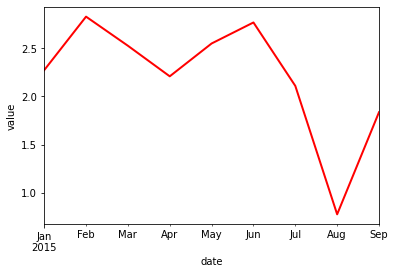

In [40]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style = 'r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

GroupBy 연산

In [41]:
#sql그룹지정기능이나 엑셀 피버테이블이랑비슷비슷

In [42]:
df['Quarter']= ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,2.273904,-0.312859,2.492615,0.364081,Q1
2015-02-28,0.556245,1.858582,-0.264276,1.108044,Q1
2015-03-31,-0.302678,-0.152055,-0.679670,0.682296,Q1
2015-04-30,-0.317773,0.128224,-0.724131,-0.032866,Q2
2015-05-31,0.341350,0.571931,1.246854,1.328263,Q2
2015-06-30,0.218525,-1.010316,0.110255,-1.059843,Q2
2015-07-31,-0.659389,2.372939,0.657872,-0.374198,Q3
2015-08-31,-1.335374,0.017698,-1.078814,1.503289,Q3
2015-09-30,1.061630,-0.581685,1.215180,0.438078,Q3


In [43]:
groups = df.groupby('Quarter')

In [44]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.842491,0.464556,0.516223,0.718140
Q2,0.080701,-0.103387,0.210993,0.078518
Q3,-0.311044,0.602984,0.264746,0.522390


In [45]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,2.273904,1.858582,2.492615,1.108044
Q2,0.341350,0.571931,1.246854,1.328263
Q3,1.061630,2.372939,1.215180,1.503289


In [46]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [47]:
df['Odd_Even']=['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd']

In [48]:
groups = df.groupby(['Quarter','Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [49]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.556245  1.858582 -0.264276  1.108044
        Odd       0.985613 -0.232457  0.906473  0.523188
Q2      Even     -0.049624 -0.441046 -0.306938 -0.546355
        Odd       0.341350  0.571931  1.246854  1.328263
Q3      Even     -1.335374  0.017698 -1.078814  1.503289
        Odd       0.201121  0.895627  0.936526  0.031940

6-2금융자료

In [50]:
from pandas_datareader import data as web

In [51]:
DAX = web.DataReader(name = '^GDAXI', data_source = 'yahoo',
                    start = '2000-1-1')

In [52]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5372 entries, 2000-01-03 to 2021-03-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5372 non-null   float64
 1   Low        5372 non-null   float64
 2   Open       5372 non-null   float64
 3   Close      5372 non-null   float64
 4   Volume     5372 non-null   float64
 5   Adj Close  5372 non-null   float64
dtypes: float64(6)
memory usage: 293.8 KB


In [53]:
DAX.tail()   #마지막 5열 보여줌

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-01,14022.019531,13873.830078,13962.429688,14012.820312,69566200.0,14012.820312
2021-03-02,14101.790039,13961.620117,13962.070312,14039.799805,63307700.0,14039.799805
2021-03-03,14197.490234,13979.730469,14130.860352,14080.030273,84766900.0,14080.030273
2021-03-04,14095.809570,13959.269531,14015.440430,14056.339844,84620900.0,14056.339844
2021-03-05,14068.030273,13868.200195,13958.540039,13920.690430,89791900.0,13920.690430


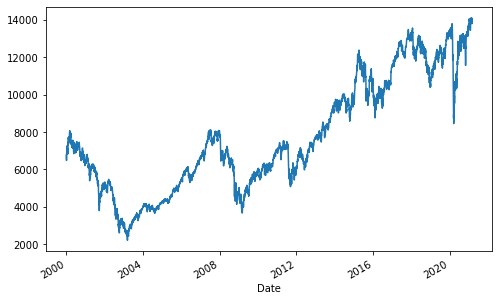

In [54]:
DAX['Close'].plot(figsize=(8,5)) #지수 전반 볼 수 있음 plot

In [55]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1,len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i]/
                               DAX['Close'][i-1])

Wall time: 508 ms


In [56]:
DAX[['Close','Ret_Loop']].tail()   #Ret_Loop 로그수익률

,Close,Ret_Loop
Date,,
2021-03-01,14012.820312,0.016298
2021-03-02,14039.799805,0.001923
2021-03-03,14080.030273,0.002861
2021-03-04,14056.339844,-0.001684
2021-03-05,13920.690430,-0.009697


In [57]:
%time DAX['Return'] = np.log(DAX['Close']/DAX['Close'].shift(1)) 
# 벡터화 사용해서 반복문 없이 결과 얻기 
DAX[['Close','Ret_Loop','Return']].tail()

Wall time: 2 ms


,Close,Ret_Loop,Return
Date,,,
2021-03-01,14012.820312,0.016298,0.016298
2021-03-02,14039.799805,0.001923,0.001923
2021-03-03,14080.030273,0.002861,0.002861
2021-03-04,14056.339844,-0.001684,-0.001684
2021-03-05,13920.690430,-0.009697,-0.009697


In [58]:
del DAX['Ret_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8804DD280>,
      dtype=object)

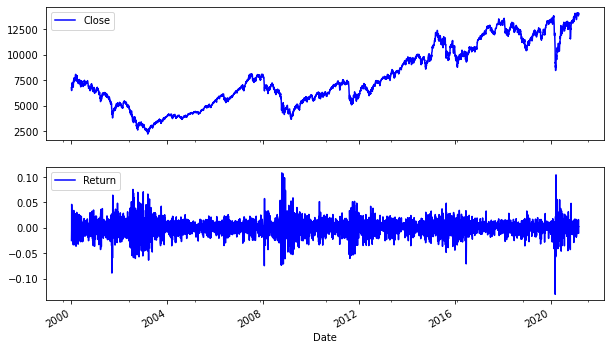

In [59]:
#raverige
DAX[['Close','Return']].plot(subplots = True,style='b',
                            figsize = (10,6))

In [60]:
#d이동평균선 rolling fun
DAX['42d'] = DAX['Close'].rolling(42).mean()
DAX['252d'] = DAX['Close'].rolling(252).mean()

In [61]:
DAX[['Close','42d','252d']].tail()

,Close,42d,252d
Date,,,
2021-03-01,14012.820312,13886.191871,12424.693011
2021-03-02,14039.799805,13893.835193,12432.845432
2021-03-03,14080.030273,13902.246861,12440.592812
2021-03-04,14056.339844,13911.892578,12448.972257
2021-03-05,13920.690430,13912.576404,12458.412020


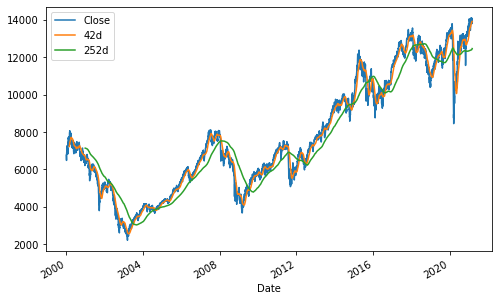

In [62]:
DAX[['Close','42d','252d']].plot(figsize=(8,5))

In [63]:
#이동 표편
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(252).std()*math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F880678B20>,
      dtype=object)

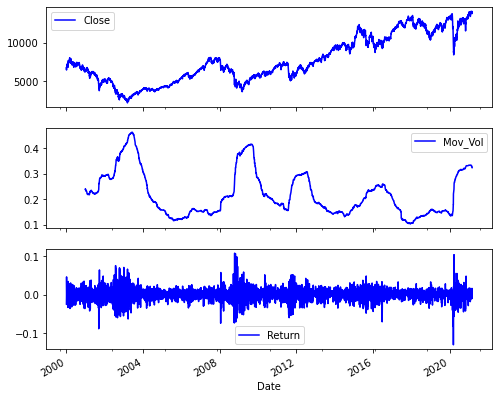

In [64]:
DAX[['Close','Mov_Vol','Return']].plot(subplots=True, style = 'b',    #subplot있으면 따로그려줌 ㅎㅎ
                                      figsize = (8,7))

6-3 회귀분석

#최소자승법 사용 OSL
euro stoxx 50, vstoxx(내재변동성 기반 계산된 변동성지수)

In [65]:
import pandas as pd
from urllib.request import urlretrieve

In [66]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

save1 = 'C:/Users/dpwl0/OneDrive/바탕화면/Finance/es.txt'
save2 = 'C:/Users/dpwl0/OneDrive/바탕화면/Finance/vs.txt'

urlretrieve(es_url,save1)
urlretrieve(vs_url,save2)


('C:/Users/dpwl0/OneDrive/바탕화면/Finance/vs.txt',
 <http.client.HTTPMessage at 0x1f880970130>)

In [67]:
lines = open(save1,'r').readlines()   #'r' 읽기모드 
lines = [k.replace(' ','') for k in lines]

In [68]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [69]:
for line in lines[3883:3890]:
    print(line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [70]:
#쉽게 import하기 위해 자료 처리

In [71]:
new_file = open('C:/Users/dpwl0/OneDrive/바탕화면/Finance/es50.txt','w') #새 파일 연다
new_file.writelines('date'+lines[3][:-1]+';DEL'+lines[3][-1]) #세번째 줄 수정해 새 파일을 첫번째 줄에 쓴다
new_file.writelines(lines[4:]) #나머지줄 옮겨쓴다
new_file.close()

In [72]:
new_lines = open('C:/Users/dpwl0/OneDrive/바탕화면/Finance/es50.txt','r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [73]:
es = pd.read_csv('C:/Users/dpwl0/OneDrive/바탕화면/Finance/es50.txt',index_col = 0,
                parse_dates = True, sep = ';',dayfirst =True)
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [74]:
del es['DEL']  #보조열 삭제
es.info() #정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB


In [75]:
cols = ['SX5P','SX5E','SXXP','SXXE','SXXF',
       'SXXA','DK5F','DKXF']
es = pd.read_csv(es_url,index_col = 0,parse_dates=True,
                sep = ';',dayfirst = True,header = None,
                skiprows = 4, names = cols)  #skiprows = 4줄까지는 무시하고 불러옴
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [76]:
vs = pd.read_csv('C:/Users/dpwl0/OneDrive/바탕화면/Finance/vs.txt',index_col = 0,header = 2,
                parse_dates = True, sep =',',dayfirst = True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2TX    4357 non-null   float64
 1   V6I1    3906 non-null   float64
 2   V6I2    4357 non-null   float64
 3   V6I3    4296 non-null   float64
 4   V6I4    4357 non-null   float64
 5   V6I5    4357 non-null   float64
 6   V6I6    4340 non-null   float64
 7   V6I7    4357 non-null   float64
 8   V6I8    4343 non-null   float64
dtypes: float64(9)
memory usage: 340.4 KB


In [77]:
import datetime as dt

In [89]:
data = pd.DataFrame({'EUROSTOXX' :
                    es['SX5E'][es.index > dt.datetime(1999,1,1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                              vs['V2TX'][vs.index > dt.datetime(1999,1,1)]}))
data = data[data.index < '2014-09-27']

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 1999-01-04 to 2014-09-26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4034 non-null   float64
 1   VSTOXX     4009 non-null   float64
dtypes: float64(2)
memory usage: 94.5 KB


In [91]:
data = data.fillna(method = 'ffill')  #ffill : forward fill, bfill : backward fill<- 미래 예측
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 1999-01-04 to 2014-09-26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4034 non-null   float64
 1   VSTOXX     4034 non-null   float64
dtypes: float64(2)
memory usage: 94.5 KB


In [80]:
data.tail()

,EUROSTOXX,VSTOXX
2014-09-22,3257.48,15.8303
2014-09-23,3205.93,17.7684
2014-09-24,3244.01,15.9504
2014-09-25,3202.31,17.5658
2014-09-26,3219.58,17.6012


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F88066FCD0>,
      dtype=object)

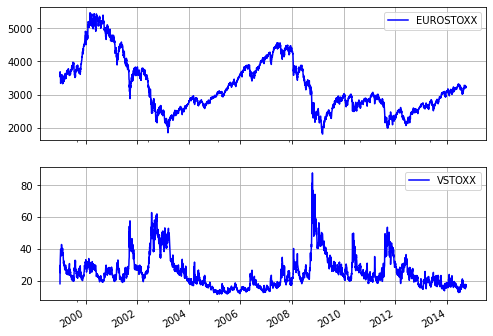

In [81]:
data.plot(subplots=True,grid = True, style = 'b',figsize=(8,6)) #

In [82]:
rets = np.log(data/data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F880B3C5E0>,
      dtype=object)

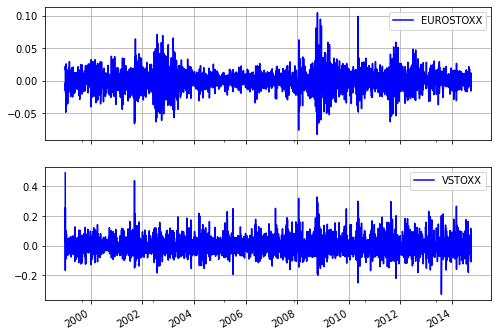

In [83]:
rets.dropna(inplace=True)
rets.plot(subplots = True, grid =True,style ='b',figsize=(8,6))

In [84]:
xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values
reg = np.polyfit(x =xdat,y = ydat,deg =1)

In [85]:
reg #상관관계(기울기),바이어스(y절편)

array([-2.75289438e+00, -7.36991255e-05])

Text(0, 0.5, 'VSTOXX returns')

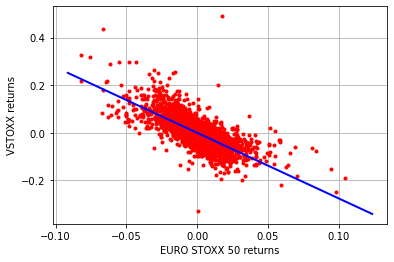

In [94]:
plt.plot(xdat,ydat,'r.')
ax =plt.axis()
x = np.linspace(ax[0],ax[1]+0.01)
plt.plot(x,reg[1]+reg[0]*x,'b',lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [87]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.729538
VSTOXX,-0.729538,1.000000


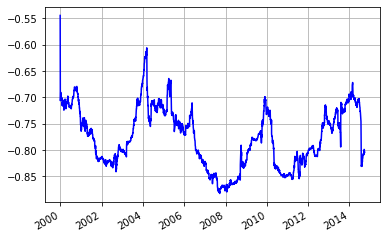

In [88]:
rets['EUROSTOXX'].rolling(252).corr(rets['VSTOXX']).plot(grid = True,style = 'b')

6-4 고빈도

In [145]:
url1 = 'http://hopey.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=GE.N&csv_format=csv'
url = url1+url2
url

'http://hopey.netfonds.no/quotes/posdump.php?date=%s%s%s&paper=GE.N&csv_format=csv'

In [153]:
url ='http://hopey.netfonds.no/tradedump.php?date=%s%s%s&paper=AAPL.O&csv_format=csv'

In [154]:
year='2021'
month='03'
days=['02','03','04']

In [155]:
GE=pd.DataFrame()
for day in days :
    GE = GE.append(pd.read_csv(url %(year ,month ,day), index_col=0,header=0,parse_dates=True))
GE.columns = ['bid','bdepth','bdeptht','offer','odepth','odeptht']

URLError: <urlopen error [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다>

In [98]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5361 entries, <html lang="no" class="sv-no-js sv-template-startpage"> to </html>
Empty DataFrame

In [125]:
NKE['bid'],plot(grid=True)

KeyError: 'bid'

In [158]:
import numpy as np
import pandas as p
from pandas.tseries.offsets import *
import datetime as dt
import matplotlib.pyplot as plt
size = (14,10)
import seaborn as sns
sns.set_style('whitegrid')

from pprint import pprint as pp
import time
# ================================================================== #
# timer start #
t0 = time.perf_counter() 

# ================================================ #
# functions
# ~~~~~~~~~~~~~~~~~~

now   = dt.date.today()
year  = str(now.year)
m     = str(now.month)
month = '0'+m


day_3 = now - 3 * BDay()
day_2 = now - 2 * BDay()
day_1 = now - 1 * BDay()

days  = [ day_1.day, day_2.day, day_3.day ]
days  = [ str(d) for d in days ]

def netfonds_p( symbol ):
    url_posdump  = r'http://www.netfonds.no/quotes/posdump.php?date=%s%s%s&paper=%s.%s&csv_format=csv'

    sym_posdump  = p.DataFrame()
    cols_posdump = [ 'bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht' ]

    # ~~~~~~~~~~~~~~~~~~
    for day in days:
        try:
            sym_posdump = sym_posdump.append( p.read_csv( url_posdump % ( year, month, day, symbol, exchange_sym ), index_col=0, header=0, parse_dates=True ) )   
        except Exception as e:
            print( "{} posdump not found".format( symbol ) )
    sym_posdump.columns = cols_posdump
    # ~~~~~~~~~~~~~~~~~~
    return sym_posdump

def netfonds_t( symbol ):
    url_tdump = r'http://www.netfonds.no/quotes/tradedump.php?date=%s%s%s&paper=%s.%s&csv_format=csv'
    sym_tdump = p.DataFrame()

    # ~~~~~~~~~~~~~~~~~~
    for day in days:
        try:
            sym_tdump = sym_tdump.append( p.read_csv( url_tdump % ( year, month, day, symbol, exchange_sym ),
                        index_col=0, header=0, parse_dates=True ) )
        except Exception as e:
            print( "{} tdump not found".format( symbol ) )
    # ~~~~~~~~~~~~~~~~~~
    return sym_tdump

def resample( data ):
    dat       = data.resample( rule='1min', how='mean').dropna()
    dat.index = dat.index.tz_localize('UTC').tz_convert('US/Eastern')
    dat       = dat.fillna(method='ffill')
    return dat

def trading_start(d):
    mkt_open = dt.datetime( int(year), int(month), int(d), 9, 30 )
    return mkt_open

def trading_end(d):
    mkt_close = dt.datetime( int(year), int(month), int(d), 16, 00 )
    return mkt_close

def trading_hours(data):
    test = []
    for d in days:
        dat = data[ ( data.index > trading_start(d) ) & ( data.index < trading_end(d) ) ]
        test.append( dat )
    return test
    
# ================================================ #
# ticker/data #
# need to know exchange symbol
# N = NYSE
# O = Nasdaq
# A = Amex # common for ETFs
# ~~~~~~~~~~~~~~~~~~
ticker       = 'NKE'
exchange_sym = 'N'

# ~~~~~~~~~~~~~~~~~~
# resample irregular tick data
pos = resample( netfonds_p( ticker ) )
t   = resample( netfonds_t( ticker ).dropna(axis=1) )

# ~~~~~~~~~~~~~~~~~~
# trading hours only
pos_rth = trading_hours( pos )
t_rth   = trading_hours( t )

pos_trading_days = [ pos_rth[0],pos_rth[1],pos_rth[2],pos_rth[3],pos_rth[4] ]
t_trading_days   = [ t_rth[0],t_rth[1],t_rth[2],t_rth[3],t_rth[4] ]

pos_rth = p.concat( pos_trading_days,ignore_index=True )
t_rth   = p.concat( t_trading_days, ignore_index=True )

# ================================================ #
# sample plots

pos_rth[['bid','bdeptht','offer','odeptht']].plot( color='blue', figsize=size, subplots=True )
plt.legend( loc='upper right' )
plt.suptitle('{} bid/offer data'.format(ticker), size=18 )
plt.show()

t_rth.plot( color='blue', figsize=size, subplots=True )
plt.legend( loc='upper right' )
plt.suptitle('{} price/volume data'.format(ticker), size=18 )
plt.show()

# ================================================================== #
# timer looking clean #
secs      = np.round( ( time.clock()  - t0 ), 4 )
time_secs = "{timeSecs} seconds to run".format(timeSecs = secs)
mins      = np.round( ( (  time.clock() ) -  t0 )  / 60, 4 ) 
time_mins = "| {timeMins} minutes to run".format(timeMins = mins)
hours     = np.round( (  time.clock()  -  t0 )  / 60 / 60, 4 ) 
time_hrs  = "| {timeHrs} hours to run".format(timeHrs = hours)
print( time_secs, time_mins, time_hrs )

NKE posdump not found
NKE posdump not found
NKE posdump not found


ValueError: Length mismatch: Expected axis has 0 elements, new values have 6 elements